In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy as np

In [3]:
data_dir = Path("dress_dataset/cloths")
data_list = os.listdir(data_dir)
print(f"Total number of dress data: {len(data_list)}")

Total number of dress data: 12681


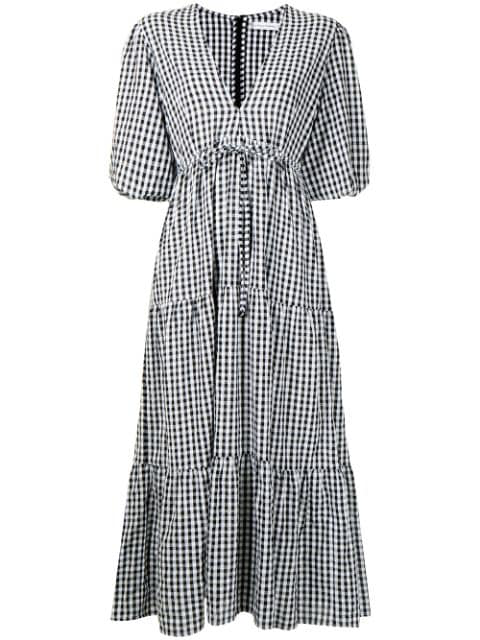

In [25]:
sample_img = Image.open(data_dir / data_list[0])
sample_img

In [35]:
sample_img = np.array(sample_img)
print(sample_img.shape)
for img in data_list:
    image = np.array(Image.open(data_dir / img))
    assert image.shape == sample_img.shape, f"Shape of the image is different from sample image, image shape: {image.shape}"

(640, 480, 3)


AssertionError: Shape of the image is different from sample image, image shape: (641, 480, 3)

* According the above cell, images are having different shapes.

<torch.utils.data.dataloader.DataLoader object at 0x7fb1358a5c10> <torch.utils.data.dataloader.DataLoader object at 0x7fb11e174820>
torch.Size([16, 3, 640, 480])


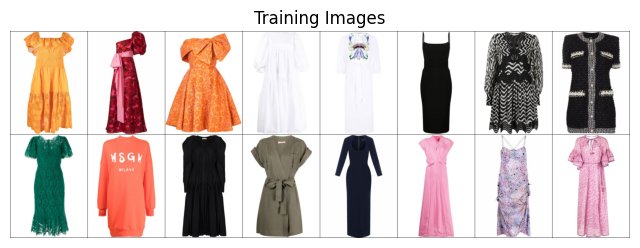

In [5]:
from dataset import DressDataset
import torch
import torchvision
from torch.utils.data import DataLoader, Subset
from torchvision.utils import make_grid
from torchvision import transforms, datasets
from pathlib import Path
import os
import glob
from typing import Tuple
from PIL import Image

data_dir = Path("dress_dataset")
# data_list = glob.glob(f"{data_dir}/*.png")
# print(len(data_list))
transform = transforms.Compose([
    transforms.Resize((640, 480)),
    transforms.ToTensor()
])
a, b = DressDataset(data_path=data_dir,
                    transform=transform,
                    train_range=0.7,
                    batch_size=16,
                    num_worker=0)
print(a, b)
print(next(iter(a))[0].shape)
sampel = next(iter(a))[0]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(make_grid(sampel).permute(1,2,0))

In [12]:
import random

t = torch.randn((1,3,64,64))
t.shape
convt = torch.nn.ConvTranspose2d(in_channels=3,
                    out_channels=9,
                    kernel_size=1)
convt(t).shape

torch.Size([1, 9, 64, 64])

In [15]:
H_in = 1
stride = 1
padding = 0
dilation = 1
kernel_size=4
output_padding=0

H_out = ((H_in - 1) * stride) + (-2 * padding) + dilation * (kernel_size-1) + output_padding + 1
H_out

4